In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import pandas as pd
import numpy as np 
from sqlalchemy import create_engine

In [ ]:
db_params = {
    'dbname': 'defaultdb',
    'user': 'avnadmin',
    'password': '...',
    'host': '...',
    'port': '10028'
}

engine = create_engine(f"postgresql://{db_params['user']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/{db_params['dbname']}")

query = "SELECT * FROM public.data;"

df = pd.read_sql(query, engine)

print(df.head())

   Hour   Date/hour start  Solar electricity generation (kWh)  \
0   0.0  01/01/2020 00:00                                 0.0   
1   1.0  01/01/2020 01:00                                 0.0   
2   2.0  01/01/2020 02:00                                 0.0   
3   3.0  01/01/2020 03:00                                 0.0   
4   4.0  01/01/2020 04:00                                 0.0   

   Electricity usage (kWh) Column5 Column6  
0                 1.509849                  
1                 1.411859                  
2                 1.023898                  
3                 0.642000                  
4                 0.960000                  


## Data Cleaning & Exploration

In [45]:
#first five rows
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Column5,Column6
0,0.0,01/01/2020 00:00,0.0,1.509849,,
1,1.0,01/01/2020 01:00,0.0,1.411859,,
2,2.0,01/01/2020 02:00,0.0,1.023898,,
3,3.0,01/01/2020 03:00,0.0,0.642000,,
4,4.0,01/01/2020 04:00,0.0,0.960000,,


In [46]:
#Last five rows
df.tail()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Column5,Column6
82729,NaN,,NaN,NaN,,
82730,NaN,,NaN,NaN,,
82731,NaN,,NaN,NaN,,
82732,NaN,,NaN,NaN,,
82733,NaN,,NaN,NaN,,


In [47]:
#Dropping unwanted/blank columns
df=df.drop(columns=['Column5','Column6'])

In [48]:
#Checking number of rows and columns
df.shape

(82734, 4)

In [49]:
#Checking column titles
df.columns

Index(['Hour', 'Date/hour start', 'Solar electricity generation (kWh)',
       'Electricity usage (kWh)'],
      dtype='object')

In [50]:
#Identifying total null values in all columns
df.isnull().sum()

Hour                                  73974
Date/hour start                           0
Solar electricity generation (kWh)    73974
Electricity usage (kWh)               73974
dtype: int64

In [51]:
#Dropping all nulls
df=df.dropna()

In [52]:
#Checking data type for all columns
df.dtypes

Hour                                  float64
Date/hour start                        object
Solar electricity generation (kWh)    float64
Electricity usage (kWh)               float64
dtype: object

In [53]:
#1st 5 rows of the cleaned data
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0.0,01/01/2020 00:00,0.0,1.509849
1,1.0,01/01/2020 01:00,0.0,1.411859
2,2.0,01/01/2020 02:00,0.0,1.023898
3,3.0,01/01/2020 03:00,0.0,0.642000
4,4.0,01/01/2020 04:00,0.0,0.960000


### Univariate Analysis
### Detecting Outliers Using Boxplot

<Axes: ylabel='Solar electricity generation (kWh)'>

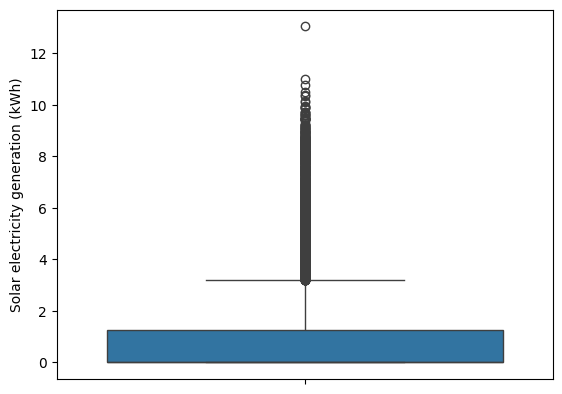

In [54]:
#Univariate Analysis
#checking for outliers using Boxplot
sns.boxplot(df['Solar electricity generation (kWh)'])

<Axes: ylabel='Electricity usage (kWh)'>

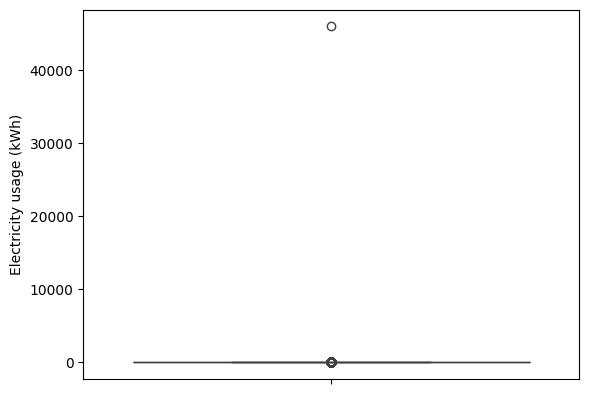

In [55]:
#Univariate Analysis
#checking for outliers using Boxplot
sns.boxplot(df['Electricity usage (kWh)'])

### Removing Outliers Using Inter Quartile Range (IQR) Method

In [56]:
#Finding the Quartile Values
Q3=df['Solar electricity generation (kWh)'].quantile(0.75)
Q1=df['Solar electricity generation (kWh)'].quantile(0.25)
IQR=Q3-Q1
print(f"The respective values for Q3,Q1,and IQR are: {Q3,Q1,IQR}")

The respective values for Q3,Q1,and IQR are: (np.float64(1.27275), np.float64(0.0), np.float64(1.27275))


In [57]:
#Finding Lower and Upper Bounds
lower_bound=Q1-IQR*1.5
upper_bound=Q3+IQR*1.5
print(f"the lower bound is:{lower_bound}, and the upper bound is:{upper_bound}")

the lower bound is:-1.909125, and the upper bound is:3.181875


In [58]:
#Detecting Outliers in the Solar Generation Column
solar_outlier=df[(df['Solar electricity generation (kWh)']<lower_bound) | (df['Solar electricity generation (kWh)']>upper_bound)]
solar_outlier

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
61,13.0,03/01/2020 13:00,3.336,0.048
156,12.0,07/01/2020 12:00,5.001,0.438
157,13.0,07/01/2020 13:00,3.969,0.012
275,11.0,12/01/2020 11:00,3.315,0.387
276,12.0,12/01/2020 12:00,5.214,46000.000
...,...,...,...,...
8575,7.0,24/12/2020 07:00,4.203,11.802
8624,8.0,26/12/2020 08:00,3.270,16.938
8672,8.0,28/12/2020 08:00,4.545,0.246
8673,9.0,28/12/2020 09:00,3.345,0.501


In [59]:
#removing the solar outliers
df=df[~((df['Solar electricity generation (kWh)']<= lower_bound)|(df['Solar electricity generation (kWh)']>=upper_bound))]

<Axes: ylabel='Solar electricity generation (kWh)'>

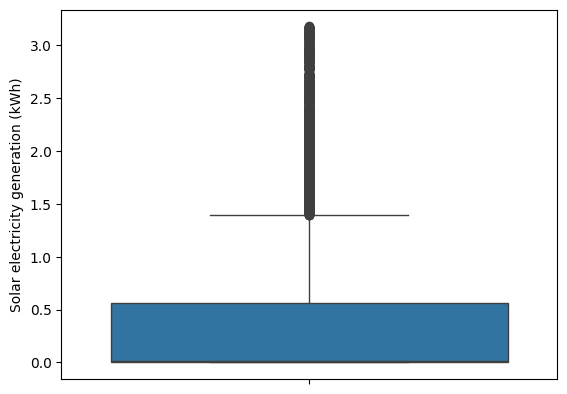

In [60]:
#checking the new data after removing outliers
sns.boxplot(df['Solar electricity generation (kWh)'])

In [61]:
#Detecting outliers in the Electricity Usage Column
q3=df['Electricity usage (kWh)'].quantile(0.75)
q1=df['Electricity usage (kWh)'].quantile(0.25)
iqr=q3-q1
e_lowerbound=q1-iqr*1.5
e_upperbound=q3+iqr*1.5
electricity_outlier=df[(df['Electricity usage (kWh)']<e_lowerbound)|(df['Electricity usage (kWh)']>e_upperbound)]
print(f"Q3:{q3},Q1:{q1},IQR:{iqr}")
electricity_outlier

Q3:1.845,Q1:0.33,IQR:1.515


,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
17,17.0,01/01/2020 17:00,0.006,-12.6240
18,18.0,01/01/2020 18:00,0.000,8.9298
20,20.0,01/01/2020 20:00,0.003,4.4286
21,21.0,01/01/2020 21:00,0.003,6.7890
37,13.0,02/01/2020 13:00,0.504,22.5000
...,...,...,...,...
8726,14.0,30/12/2020 14:00,0.744,26.2260
8730,18.0,30/12/2020 18:00,0.012,7.0092
8754,18.0,31/12/2020 18:00,0.012,4.8972
8755,19.0,31/12/2020 19:00,0.012,4.3956


In [62]:
#removing the electricity_outlier
df=df[~((df['Electricity usage (kWh)']<=e_lowerbound)|(df['Electricity usage (kWh)']>=e_upperbound))]

<Axes: ylabel='Electricity usage (kWh)'>

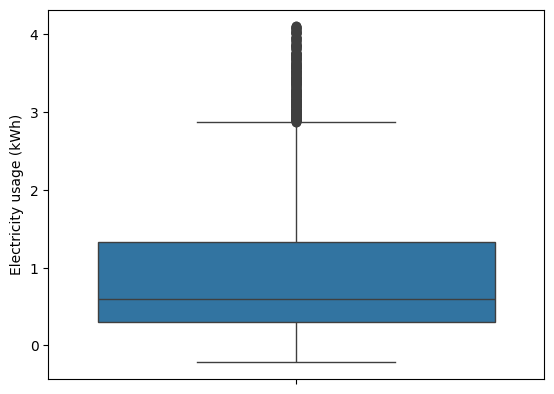

In [63]:
#checking the new data after removing electricity outlier
sns.boxplot(df['Electricity usage (kWh)'])

## Data Manipulation & Visualization

In [64]:
#Getting the Summary Statistics for solar electricity generation and electric usage
df[['Solar electricity generation (kWh)','Electricity usage (kWh)']].describe()

,Solar electricity generation (kWh),Electricity usage (kWh)
count,6782.000000,6782.000000
mean,0.429767,0.957418
std,0.744858,0.883042
min,0.000000,-0.217500
25%,0.000000,0.306000
50%,0.012000,0.594000
75%,0.561000,1.332000
max,3.180000,4.098600


In [65]:
#Converting the date/hour column into datetime
#df['Date/hour start']=df['Date/hour start'].datetime(mmmm-dd-yy-hh)
df['Date/hour start']=pd.to_datetime(df['Date/hour start'], errors='coerce',dayfirst=True)

In [66]:
#Checking for nulls after date conversion
df.isnull().sum()

Hour                                  0
Date/hour start                       0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
dtype: int64

In [67]:
#Extracting month from the date/hour column 
month_extract=df['Date/hour start'].dt.month_name
month_extract()

0        January
1        January
2        January
3        January
4        January
          ...   
8752    December
8753    December
8757    December
8758    December
8759    December
Name: Date/hour start, Length: 6782, dtype: object

In [68]:
#Permanently adding the month_extract column to the dataframe
df['month_extract']=month_extract()

In [69]:
#Newly updated Dataset
#Checking the updated columns using indexes
df.iloc[7000:7003]

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),month_extract


## Univariate Analysis

## Bivariate Analysis

In [70]:
#Total solar electricity generated per month. Sorted from lowest generation to highest
total_solar_gen=df.groupby('month_extract')['Solar electricity generation (kWh)'].sum().sort_values(ascending=True)
total_solar_gen

month_extract
December     104.523
January      110.325
February     175.416
November     177.273
March        245.766
October      247.119
April        270.009
September    285.921
May          287.664
August       330.111
July         337.965
June         342.585
Name: Solar electricity generation (kWh), dtype: float64

<Axes: ylabel='month_extract'>

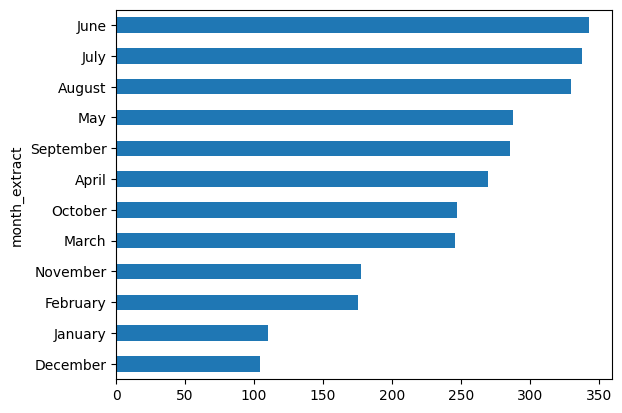

In [71]:
#Bar graph visual of monthly solar generation
total_solar_gen.plot(kind='barh')

In [72]:
#Monthy electricity usage
monthly_electricityusage=df.groupby('month_extract')['Electricity usage (kWh)'].sum().sort_values(ascending=True)
monthly_electricityusage

month_extract
May          420.124409
June         420.546738
July         447.505521
April        486.819574
August       500.277651
October      526.418876
February     533.812610
November     564.788569
September    588.616427
March        611.187868
January      675.819181
December     717.292595
Name: Electricity usage (kWh), dtype: float64

<Axes: ylabel='Electricity usage (kWh)'>

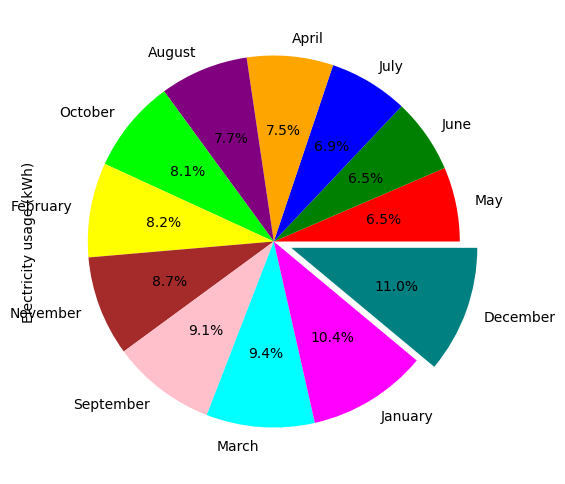

In [73]:
#Visual for monthly electricity usage # using explode and color to enhance the visual
explode=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,]
color=['Red','Green','Blue','Orange','purple','Lime','Yellow','Brown','Pink','cyan','Magenta','Teal']
plt.figure(figsize=(6,15))
monthly_electricityusage.plot.pie(explode=explode,colors=color,autopct='%1.1F%%')

In [74]:
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),month_extract
0,0.0,2020-01-01 00:00:00,0.0,1.509849,January
1,1.0,2020-01-01 01:00:00,0.0,1.411859,January
2,2.0,2020-01-01 02:00:00,0.0,1.023898,January
3,3.0,2020-01-01 03:00:00,0.0,0.642000,January
4,4.0,2020-01-01 04:00:00,0.0,0.960000,January


In [75]:
#TO BE UPDATED ######
#Total solar generated per month sorted by month from Jan to Dec
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month_extract']=pd.Categorical(df['month_extract'],categories=month_order,ordered=True)
hour_solar=df.groupby('month_extract')['Solar electricity generation (kWh)'].sum()
hour_solar

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15660\2691875711.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_solar=df.groupby('month_extract')['Solar electricity generation (kWh)'].sum()


month_extract
January      110.325
February     175.416
March        245.766
April        270.009
May          287.664
June         342.585
July         337.965
August       330.111
September    285.921
October      247.119
November     177.273
December     104.523
Name: Solar electricity generation (kWh), dtype: float64

<Axes: xlabel='month_extract', ylabel='Solar electricity generation (kWh)'>

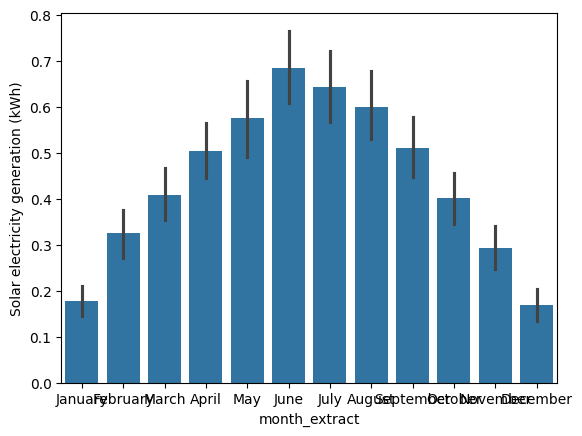

In [76]:
#To be updated #Bivariate Analysis
sns.barplot(x=df['month_extract'], y=df['Solar electricity generation (kWh)'],data=df)

## Multivariate Analysis

In [77]:
#Average Electricity Usage & Average Solar Generation
avg_solar_electricity=df.groupby('Hour')[['Solar electricity generation (kWh)', 'Electricity usage (kWh)']].mean()
avg_solar_electricity

,Solar electricity generation (kWh),Electricity usage (kWh)
Hour,,
0.0,0.000000,0.711209
1.0,0.000000,0.390031
2.0,0.000000,0.250623
3.0,0.000000,0.407688
4.0,0.078975,0.457097
5.0,0.248263,0.488073
6.0,0.437137,0.622284
7.0,0.749225,0.993520
8.0,1.086791,0.960689


<Axes: xlabel='Hour'>

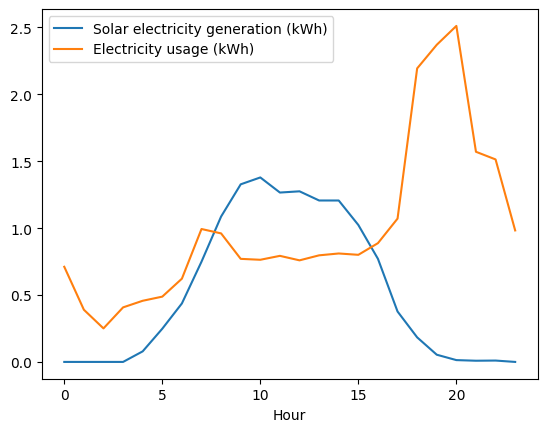

In [78]:
avg_solar_electricity.plot(kind='line')

### Calculating Electricity Bought

In [88]:
#Calculating the electricity bought and #removing negatives in the new column
df['elec_bought']=df['Electricity usage (kWh)']-df['Solar electricity generation (kWh)']
df.loc[df['elec_bought']<0,'elec_bought']=0

In [80]:
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),month_extract,elec_bought
0,0.0,2020-01-01 00:00:00,0.0,1.509849,January,1.509849
1,1.0,2020-01-01 01:00:00,0.0,1.411859,January,1.411859
2,2.0,2020-01-01 02:00:00,0.0,1.023898,January,1.023898
3,3.0,2020-01-01 03:00:00,0.0,0.642000,January,0.642000
4,4.0,2020-01-01 04:00:00,0.0,0.960000,January,0.960000


In [81]:
df.describe()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),elec_bought
count,6782.000000,6782,6782.000000,6782.000000,6782.000000
mean,11.048363,2020-07-03 16:40:42.819227392,0.429767,0.957418,0.769530
min,0.000000,2020-01-01 00:00:00,0.000000,-0.217500,0.000000
25%,4.000000,2020-03-27 23:15:00,0.000000,0.306000,0.093248
50%,11.000000,2020-07-06 20:30:00,0.012000,0.594000,0.371963
75%,18.000000,2020-10-08 23:45:00,0.561000,1.332000,1.193020
max,23.000000,2020-12-31 23:00:00,3.180000,4.098600,4.092000
std,7.438269,NaN,0.744858,0.883042,0.915180


In [ ]:
#monthly electricity bought
monthly_elecbought=df.groupby('month_extract')['elec_bought'].sum()
monthly_elecbought

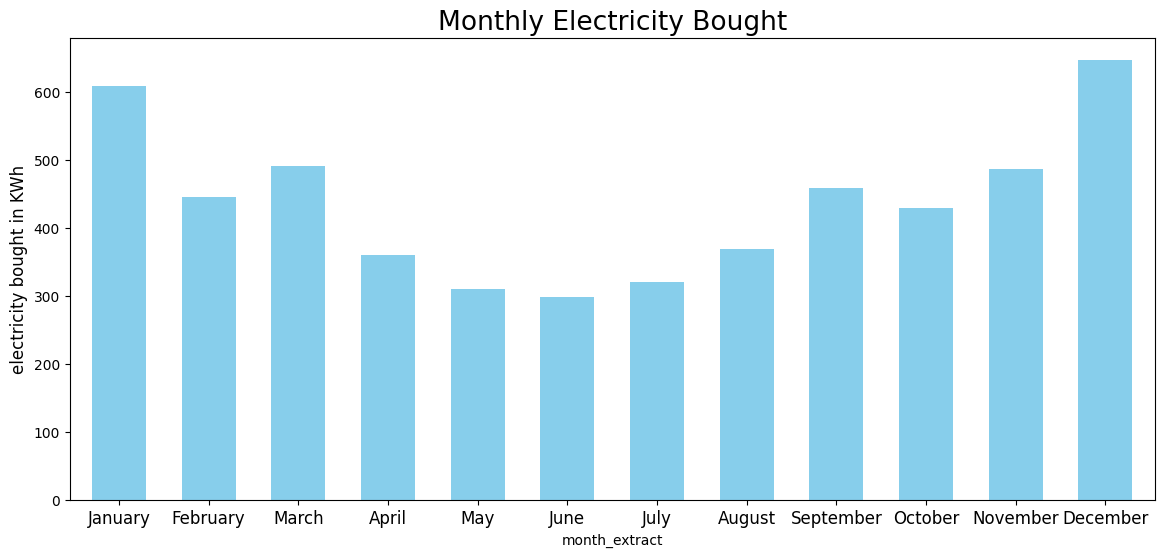

In [83]:
plt.figure(figsize=(14,6))
monthly_elecbought.plot(kind='bar',color='skyblue',width=0.6)
plt.title('Monthly Electricity Bought',fontsize=19)
plt.ylabel('electricity bought in KWh',fontsize=12)
plt.xticks(rotation=360,fontsize=12,ha='center');

### Calculating Excess Solar Generated

In [84]:
#Calculating excess solar generation
df['excess_solar_generated']=df['Solar electricity generation (kWh)']-df['Electricity usage (kWh)']

In [86]:
#removing negatives in the excess excess solar generated column
df.loc[df['excess_solar_generated']<0,'excess_solar_generated']=0

In [87]:
df.describe()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),elec_bought,excess_solar_generated
count,6782.000000,6782,6782.000000,6782.000000,6782.000000,6782.000000
mean,11.048363,2020-07-03 16:40:42.819227392,0.429767,0.957418,0.769530,0.241878
min,0.000000,2020-01-01 00:00:00,0.000000,-0.217500,0.000000,0.000000
25%,4.000000,2020-03-27 23:15:00,0.000000,0.306000,0.093248,0.000000
50%,11.000000,2020-07-06 20:30:00,0.012000,0.594000,0.371963,0.000000
75%,18.000000,2020-10-08 23:45:00,0.561000,1.332000,1.193020,0.000000
max,23.000000,2020-12-31 23:00:00,3.180000,4.098600,4.092000,3.009000
std,7.438269,NaN,0.744858,0.883042,0.915180,0.578807


In [93]:
#average excess solar generation on a monthly basis
monthly_excess_solar_generation=df.groupby('month_extract')['excess_solar_generated'].mean()
monthly_excess_solar_generation

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15660\106055962.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_excess_solar_generation=df.groupby('month_extract')['excess_solar_generated'].mean()


month_extract
January      0.067795
February     0.160189
March        0.208987
April        0.266043
May          0.354192
June         0.439242
July         0.400423
August       0.360976
September    0.278052
October      0.242592
November     0.162461
December     0.055189
Name: excess_solar_generated, dtype: float64

In [96]:
df=df.reset_index(drop=True)

In [ ]:
#Modelling the Battery Charge Level
battery_charge=[0]
for i in range(1,len(df)):
    value=battery_charge[-1]+df.loc[i,'excess_solar_generated']-df.loc[i,'Electricity usage (kWh)']
    value=max(0,min(value,12.5))
    battery_charge.append(value)
print(battery_charge,end=' ')